Para explicar el problema que estamos abordando, primero definamos las fuerzas involucradas y las ecuaciones que gobiernan el movimiento de un satélite alrededor de la Tierra.

La fuerza gravitacional $\mathbf{F}_g$ experimentada por un satélite de masa $m$ a una distancia $\mathbf{r}$ del centro de la Tierra está dada por la ley de gravitación universal de Newton:

$$ \mathbf{F}_g = -\frac{GMm}{|\mathbf{r}|^3} \mathbf{r} $$
Donde:
- $G$ es la constante de gravitación universal ($G = 6.672 \times 10^{-11} \, \text{Nm}^2/\text{kg}^2$).
- $M$ es la masa de la Tierra.
- $\mathbf{r}$ es el vector de posición del satélite con respecto al centro de la Tierra.
- $\mu$ es la constante de Kepler ($\mu = GM = 3.9861352 \times 10^{14} \, \text{km}^3/\text{s}^2$).

La segunda ley de Newton, también conocida como la ley de fuerza o ley de la inercia, establece que la tasa de cambio del momento lineal de un objeto es igual a la fuerza neta actuando sobre él. Para un movimiento circular uniforme, la aceleración centrípeta se relaciona con la velocidad y el radio de curvatura de la siguiente manera:

$$ \mathbf{F}_c = m \frac{d^2\mathbf{r}}{dt^2} = m \mathbf{a}_c $$

Igualando la fuerza gravitacional con la fuerza centrípeta, obtenemos la ecuación diferencial que describe la órbita del satélite:

$$ \frac{d^2\mathbf{r}}{dt^2} = -\frac{\mu}{|\mathbf{r}|^3} \mathbf{r} $$

Esta ecuación diferencial describe la aceleración experimentada por el satélite en función de su posición $\mathbf{r}$ y la constante de Kepler $\mu$. Resolver esta ecuación nos permite determinar la trayectoria del satélite en su órbita alrededor de la Tierra. En el programa, buscamos encontrar una solución numérica para esta ecuación diferencial utilizando métodos de integración numérica. Al obtener la solución numérica, podemos visualizar la trayectoria del satélite y estudiar su movimiento orbital.

El objetivo es obtener información sobre la órbita del satélite, como su perigeo (el punto más cercano a la Tierra en su órbita) y su apogeo (el punto más alejado de la Tierra en su órbita). Estos puntos son de interés en aplicaciones prácticas, como el diseño de misiones espaciales y la planificación de maniobras orbitales.

Distancia al perigeo: 31847444.98977953
Distancia al apogeo: 31855005.986172527


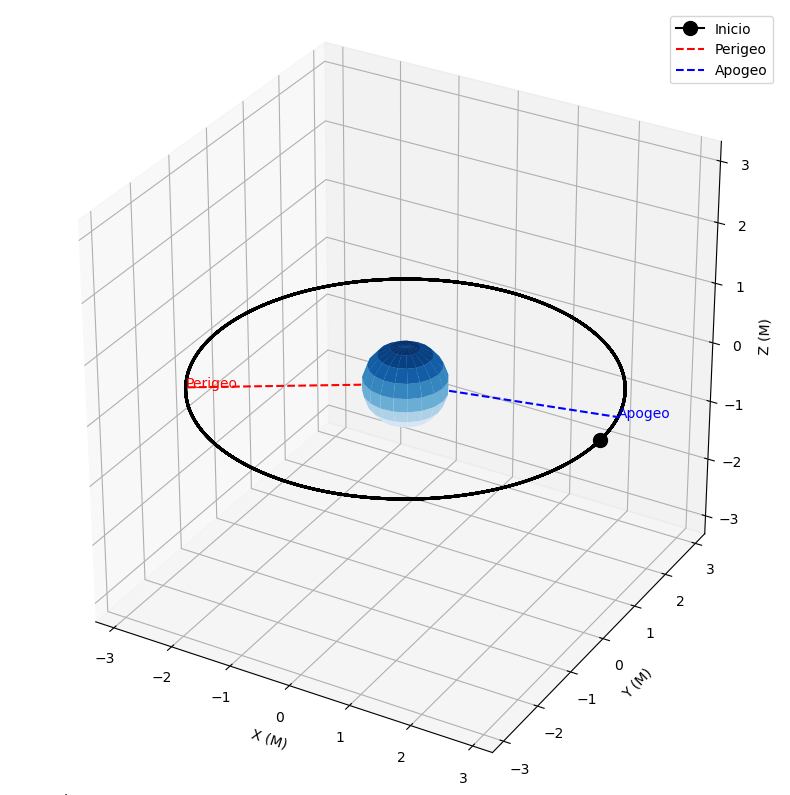

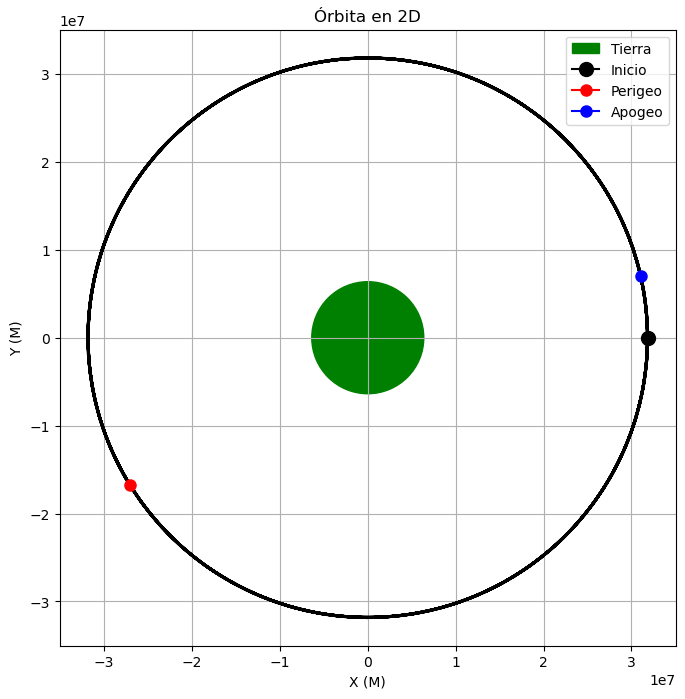

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
import tkinter as tk

# Constantes
G = 6.67430e-11  # Constante de gravitación universal (m^3/kg/s^2)
M = 5.972e24      # Masa de la Tierra (kg)
R = 6371000       # Radio de la Tierra (m)
mu = G * M

def orbit(t, y, mu):
    rx, ry, rz, vx, vy, vz = y
    r = np.array([rx, ry, rz])
    norma_r = np.linalg.norm(r)
    ax, ay, az = -r * mu / norma_r**3
    return [vx, vy, vz, ax, ay, az]

def calcular_orbita(velocidad):
    distancia_inicial = 5 * R
    v_mag = velocidad
    r0 = [distancia_inicial, 0, 0]
    v0 = [0, v_mag, 0]
    tspan = 10000*60
    dt = 1000
    n_steps = int(np.ceil(tspan/dt))
    ys = np.zeros((n_steps, 6))
    ts = np.zeros((n_steps, 1))
    y0 = r0 + v0
    ys[0] = np.array(y0)
    step = 1
    solver = ode(orbit)
    solver.set_integrator('lsoda')
    solver.set_initial_value(y0, 0)
    solver.set_f_params(mu)
    while solver.successful() and step < n_steps:
        solver.integrate(solver.t + dt)
        ts[step] = solver.t
        ys[step] = solver.y
        step += 1
    rs = ys[:,:3]
    idx_perigeo = np.argmin(np.linalg.norm(rs, axis=1))
    perigeo = rs[idx_perigeo]
    idx_apogeo = np.argmax(np.linalg.norm(rs, axis=1))
    apogeo = rs[idx_apogeo]
    distancia_perigeo = np.linalg.norm(perigeo)
    distancia_apogeo = np.linalg.norm(apogeo)
    #print("Perigeo:", perigeo)
    print("Distancia al perigeo:", distancia_perigeo)
    #print("Apogeo:", apogeo)
    print("Distancia al apogeo:", distancia_apogeo)
    return rs, perigeo, apogeo

def plot(r, perigeo, apogeo):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(r[:, 0], r[:, 1], r[:, 2], color='black', linewidth=2)
    ax.plot(r[0, 0], r[0, 1], r[0, 2], marker='o', markersize=10, color='black', label='Inicio')  # Etiqueta para el punto de inicio

    r_plot = R
    _u, _v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    _x = r_plot * np.cos(_u) * np.sin(_v)
    _y = r_plot * np.sin(_u) * np.sin(_v)
    _z = r_plot * np.cos(_v)
    ax.plot_surface(_x, _y, _z, cmap='Blues')

    l = r_plot * 2.0
    x, y, z = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    u, v, w = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    ax.quiver(x, y, z, u, v, w, color='k')

    max_val = np.max(np.abs(r))
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    ax.set_xlabel('X (M)')
    ax.set_ylabel('Y (M)')
    ax.set_zlabel('Z (M)')
    ax.set_aspect('equal')

    # Agregar el perigeo y el apogeo a la gráfica
    ax.plot([0, perigeo[0]], [0, perigeo[1]], [0, perigeo[2]], linestyle='--', color='red', label='Perigeo')
    ax.plot([0, apogeo[0]], [0, apogeo[1]], [0, apogeo[2]], linestyle='--', color='blue', label='Apogeo')
    ax.text(perigeo[0], perigeo[1], perigeo[2], "Perigeo", color='red')
    ax.text(apogeo[0], apogeo[1], apogeo[2], "Apogeo", color='blue')

    plt.legend()
    plt.show()

def plot2D(r, perigeo, apogeo):
    # Definir la Tierra como un círculo
    tierra = plt.Circle((0, 0), R, color='green', label='Tierra')

    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.add_artist(tierra)

    plt.plot(r[:, 0], r[:, 1], color='black', linewidth=2)
    plt.plot(r[0, 0], r[0, 1], marker='o', markersize=10, color='black', label='Inicio')  # Etiqueta para el punto de inicio
    plt.plot(perigeo[0], perigeo[1], marker='o', markersize=8, color='red', label='Perigeo')  # Etiqueta para el perigeo
    plt.plot(apogeo[0], apogeo[1], marker='o', markersize=8, color='blue', label='Apogeo')  # Etiqueta para el apogeo

    plt.xlabel('X (M)')
    plt.ylabel('Y (M)')
    plt.title('Órbita en 2D')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.show()

def obtener_velocidad():
    try:
        velocidad = float(entry_velocidad.get())
        if velocidad < 0:
            raise ValueError
        rs, perigeo, apogeo = calcular_orbita(velocidad)
        plot(rs, perigeo, apogeo)
        plot2D(rs, perigeo, apogeo)
    except ValueError:
        tk.messagebox.showerror("Error", "Ingrese una velocidad válida (mayor que 0).")

distancia_inicial = 5 * R     
v_mag1 = np.sqrt(mu / distancia_inicial)
v_mag2 = 0.8 * np.sqrt(mu / distancia_inicial)
v_mag3 = 1.2 * np.sqrt(mu / distancia_inicial)

# Crear texto con las velocidades recomendadas
recomendadas_texto = f"Velocidades Recomendadas:\n" \
                     f"v_mag = {v_mag1} m/s\n" \
                     f"v_mag = {v_mag2} m/s\n" \
                     f"v_mag = {v_mag3} m/s\n" 
# Crear ventana principal
root = tk.Tk()
root.title("Calculadora de Órbita")

# Etiqueta y entrada para la velocidad
tk.Label(root, text="Velocidad del satélite (m/s):").pack()
entry_velocidad = tk.Entry(root)
entry_velocidad.pack()

# Botón para calcular la órbita
tk.Button(root, text="Calcular Órbita", command=obtener_velocidad).pack()

# Etiqueta para mostrar las velocidades recomendadas
tk.Label(root, text=recomendadas_texto, justify=tk.LEFT).pack()

# Ejecutar interfaz gráfica
root.mainloop()


Perigeo: [-14988660.53842154    101282.46957256         0.        ]
Distancia al perigeo: 14989002.731158527
Apogeo: [31868380.72442274   209245.11058152        0.        ]
Distancia al apogeo: 31869067.65992788


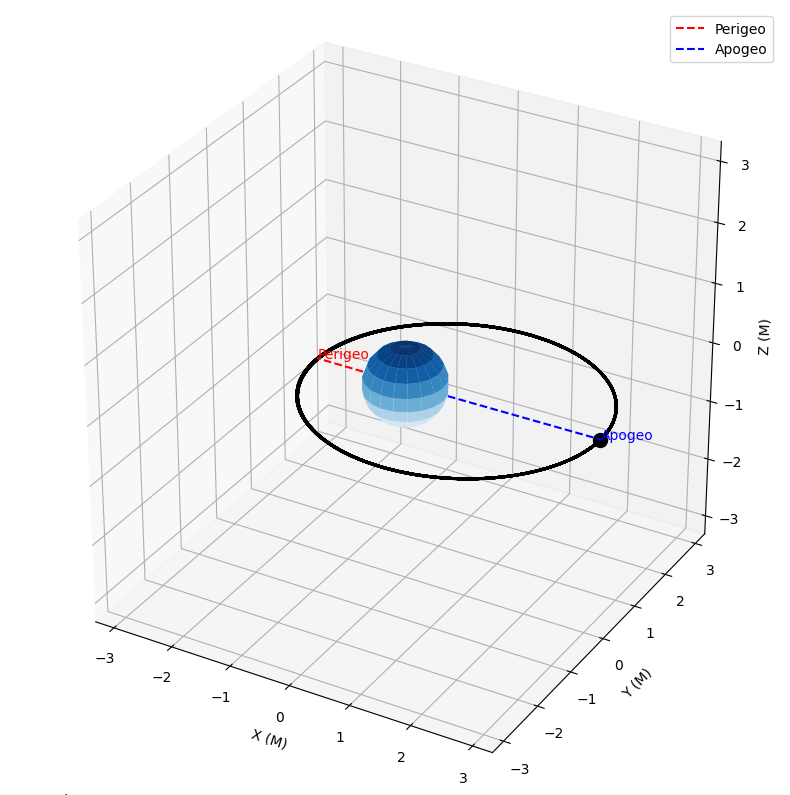

In [40]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np

def plot(r, perigeo, apogeo):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(r[:, 0], r[:, 1], r[:, 2], color='black', linewidth=2)
    ax.plot(r[0, 0], r[0, 1], r[0, 2], marker='o', markersize=10, color='black')

    r_plot = R
    _u, _v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    _x = r_plot * np.cos(_u) * np.sin(_v)
    _y = r_plot * np.sin(_u) * np.sin(_v)
    _z = r_plot * np.cos(_v)
    ax.plot_surface(_x, _y, _z, cmap='Blues')

    l = r_plot * 2.0
    x, y, z = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    u, v, w = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    ax.quiver(x, y, z, u, v, w, color='k')

    max_val = np.max(np.abs(r))
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    ax.set_xlabel('X (M)')
    ax.set_ylabel('Y (M)')
    ax.set_zlabel('Z (M)')
    ax.set_aspect('equal')

    # Agregar el perigeo y el apogeo a la gráfica
    ax.plot([0, perigeo[0]], [0, perigeo[1]], [0, perigeo[2]], linestyle='--', color='red', label='Perigeo')
    ax.plot([0, apogeo[0]], [0, apogeo[1]], [0, apogeo[2]], linestyle='--', color='blue', label='Apogeo')
    ax.text(perigeo[0], perigeo[1], perigeo[2], "Perigeo", color='red')
    ax.text(apogeo[0], apogeo[1], apogeo[2], "Apogeo", color='blue')

    plt.legend()

    plt.show()




# Constantes
G = 6.67430e-11  # Constante de gravitación universal (m^3/kg/s^2)
M = 5.972e24      # Masa de la Tierra (kg)
R = 6371000       # Radio de la Tierra (m)
mu = G * M

def orbit(t, y, mu):
    rx, ry, rz, vx, vy, vz = y
    r = np.array([rx, ry, rz])
    norma_r = np.linalg.norm(r)

    ax, ay, az = -r * mu / norma_r**3

    return [vx, vy, vz, ax, ay, az]


if __name__ == '__main__':
  distancia_inicial = 5 * R
  # Solicitar al usuario que ingrese la velocidad
  #v_mag = float(input("Ingrese la velocidad del satélite (en m/s): "))
  #v_mag = np.sqrt(mu/distancia_inicial)
  v_mag = 0.8 * np.sqrt(mu / distancia_inicial)
  #v_mag = 1.2 * np.sqrt(mu / distancia_inicial)
  #v_mag = 300

  r0 = [distancia_inicial,0,0]
  v0=[0,v_mag,0]

  tspan = 10000*60

  dt=1000

  n_steps = int(np.ceil(tspan/dt))

  ys = np.zeros((n_steps,6))
  ts = np.zeros((n_steps,1))

  y0= r0 + v0
  ys[0]=np.array(y0)
  step = 1

  solver = ode(orbit)
  solver.set_integrator('lsoda')
  solver.set_initial_value(y0,0)
  solver.set_f_params(mu)

  while solver.successful() and step < n_steps:
    solver.integrate(solver.t + dt)
    ts[step] = solver.t
    ys[step] = solver.y
    step += 1


rs = ys[:,:3]

# Calcular el perigeo y el apogeo
idx_perigeo = np.argmin(np.linalg.norm(rs, axis=1))
perigeo = rs[idx_perigeo]

idx_apogeo = np.argmax(np.linalg.norm(rs, axis=1))
apogeo = rs[idx_apogeo]

distancia_perigeo = np.linalg.norm(perigeo)
distancia_apogeo = np.linalg.norm(apogeo)

print("Perigeo:", perigeo)
print("Distancia al perigeo:", distancia_perigeo)
print("Apogeo:", apogeo)
print("Distancia al apogeo:", distancia_apogeo)

# Graficar la órbita con el perigeo y el apogeo
plot(rs, perigeo, apogeo)


Perigeo: [-14988550.01068394    106142.00418637         0.        ]
Distancia al perigeo: 14988925.8303531
Apogeo: [31869012.75856002   200848.62019269        0.        ]
Distancia al apogeo: 31869645.658110082


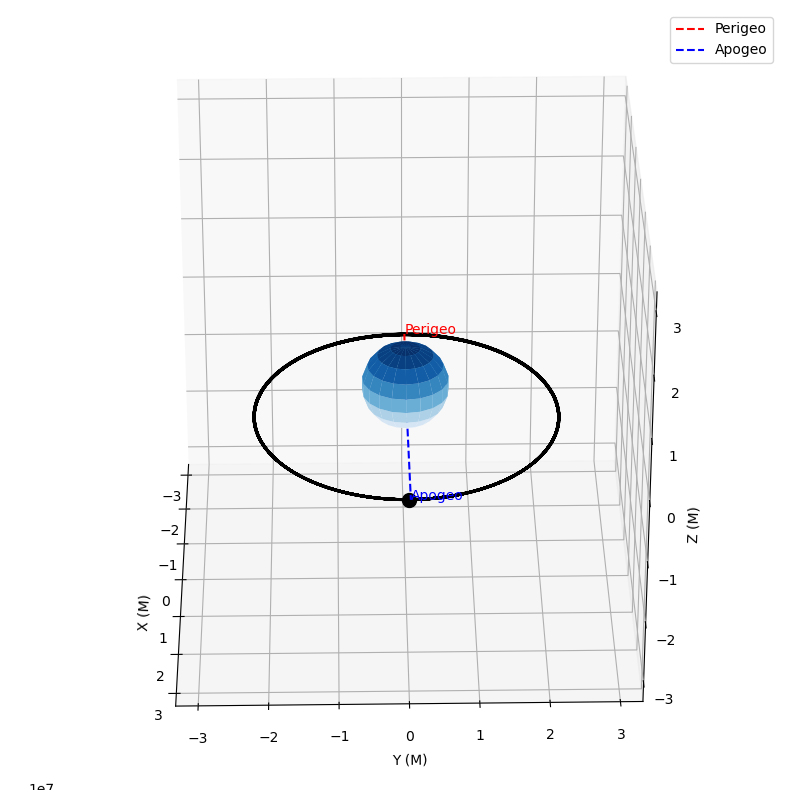

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import imageio

# Constantes
G = 6.67430e-11  # Constante de gravitación universal (m^3/kg/s^2)
M = 5.972e24      # Masa de la Tierra (kg)
R = 6371000       # Radio de la Tierra (m)
mu = G * M

def orbit(t, y, mu):
    rx, ry, rz, vx, vy, vz = y
    r = np.array([rx, ry, rz])
    norma_r = np.linalg.norm(r)

    ax, ay, az = -r * mu / norma_r**3

    return [vx, vy, vz, ax, ay, az]

def plot_animation(rs, perigeo, apogeo):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(rs[:, 0], rs[:, 1], rs[:, 2], color='black', linewidth=2)
    ax.plot(rs[0, 0], rs[0, 1], rs[0, 2], marker='o', markersize=10, color='black')

    r_plot = R
    _u, _v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    _x = r_plot * np.cos(_u) * np.sin(_v)
    _y = r_plot * np.sin(_u) * np.sin(_v)
    _z = r_plot * np.cos(_v)
    ax.plot_surface(_x, _y, _z, cmap='Blues')

    l = r_plot * 2.0
    x, y, z = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    u, v, w = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    ax.quiver(x, y, z, u, v, w, color='k')

    max_val = np.max(np.abs(rs))
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    ax.set_xlabel('X (M)')
    ax.set_ylabel('Y (M)')
    ax.set_zlabel('Z (M)')
    ax.set_aspect('equal')

    # Agregar el perigeo y el apogeo a la gráfica
    ax.plot([0, perigeo[0]], [0, perigeo[1]], [0, perigeo[2]], linestyle='--', color='red', label='Perigeo')
    ax.plot([0, apogeo[0]], [0, apogeo[1]], [0, apogeo[2]], linestyle='--', color='blue', label='Apogeo')
    ax.text(perigeo[0], perigeo[1], perigeo[2], "Perigeo", color='red')
    ax.text(apogeo[0], apogeo[1], apogeo[2], "Apogeo", color='blue')

    plt.legend()

    def update(frame):
        ax.view_init(30, frame)

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50)
    
    # Guardar la animación como un archivo de GIF
    writer = imageio.get_writer('orbit_animation.gif', duration=0.05)
    for i in range(360):
        update(i)
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        writer.append_data(image)
    writer.close()

if __name__ == '__main__':
    distancia_inicial = 5 * R
    v_mag = 0.8 * np.sqrt(mu / distancia_inicial)

    r0 = [distancia_inicial, 0, 0]
    v0 = [0, v_mag, 0]

    tspan = 10000*60
    dt = 1000
    n_steps = int(np.ceil(tspan/dt))

    ys = np.zeros((n_steps, 6))
    ts = np.zeros((n_steps, 1))

    y0 = r0 + v0
    ys[0] = np.array(y0)
    step = 1

    solver = ode(orbit)
    solver.set_integrator('lsoda')
    solver.set_initial_value(y0, 0)
    solver.set_f_params(mu)

    while solver.successful() and step < n_steps:
        solver.integrate(solver.t + dt)
        ts[step] = solver.t
        ys[step] = solver.y
        step += 1

    rs = ys[:, :3]

    # Calcular el perigeo y el apogeo
    idx_perigeo = np.argmin(np.linalg.norm(rs, axis=1))
    perigeo = rs[idx_perigeo]

    idx_apogeo = np.argmax(np.linalg.norm(rs, axis=1))
    apogeo = rs[idx_apogeo]

    distancia_perigeo = np.linalg.norm(perigeo)
    distancia_apogeo = np.linalg.norm(apogeo)

    print("Perigeo:", perigeo)
    print("Distancia al perigeo:", distancia_perigeo)
    print("Apogeo:", apogeo)
    print("Distancia al apogeo:", distancia_apogeo)

    # Graficar la órbita con el perigeo y el apogeo
    plot_animation(rs, perigeo, apogeo)


Perigeo: [-14988550.01068394    106142.00418637         0.        ]
Distancia al perigeo: 14988925.8303531
Apogeo: [31869012.75856002   200848.62019269        0.        ]
Distancia al apogeo: 31869645.658110082


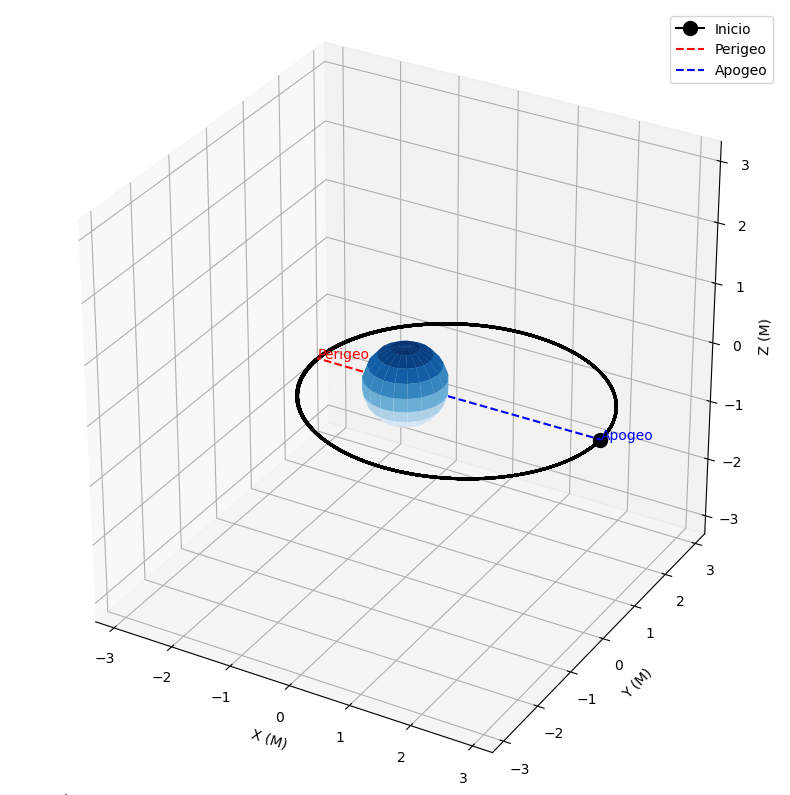

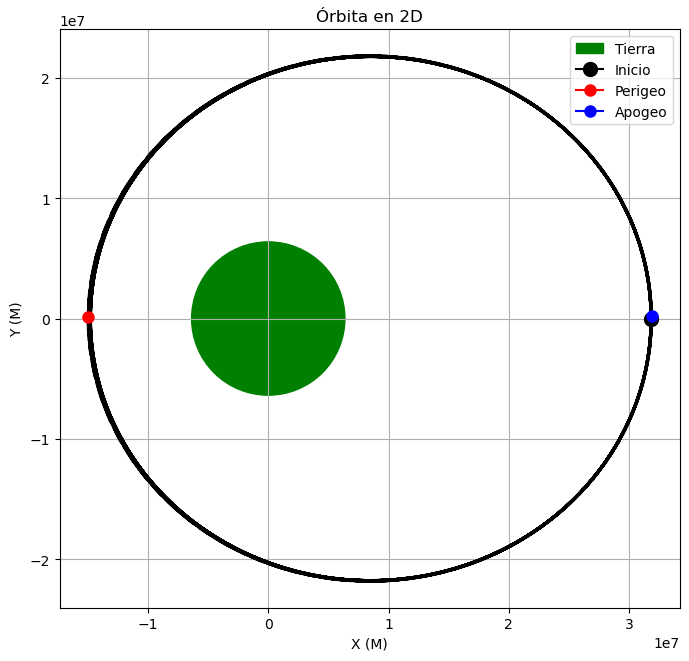

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

def plot(r, perigeo, apogeo):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(r[:, 0], r[:, 1], r[:, 2], color='black', linewidth=2)
    ax.plot(r[0, 0], r[0, 1], r[0, 2], marker='o', markersize=10, color='black', label='Inicio')  # Etiqueta para el punto de inicio

    r_plot = R
    _u, _v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
    _x = r_plot * np.cos(_u) * np.sin(_v)
    _y = r_plot * np.sin(_u) * np.sin(_v)
    _z = r_plot * np.cos(_v)
    ax.plot_surface(_x, _y, _z, cmap='Blues')

    l = r_plot * 2.0
    x, y, z = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    u, v, w = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    ax.quiver(x, y, z, u, v, w, color='k')

    max_val = np.max(np.abs(r))
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    ax.set_xlabel('X (M)')
    ax.set_ylabel('Y (M)')
    ax.set_zlabel('Z (M)')
    ax.set_aspect('equal')

    # Agregar el perigeo y el apogeo a la gráfica
    ax.plot([0, perigeo[0]], [0, perigeo[1]], [0, perigeo[2]], linestyle='--', color='red', label='Perigeo')
    ax.plot([0, apogeo[0]], [0, apogeo[1]], [0, apogeo[2]], linestyle='--', color='blue', label='Apogeo')
    ax.text(perigeo[0], perigeo[1], perigeo[2], "Perigeo", color='red')
    ax.text(apogeo[0], apogeo[1], apogeo[2], "Apogeo", color='blue')

    plt.legend()
    plt.show()

def plot2D(r, perigeo, apogeo):
    # Definir la Tierra como un círculo
    tierra = plt.Circle((0, 0), R, color='green', label='Tierra')

    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.add_artist(tierra)

    plt.plot(r[:, 0], r[:, 1], color='black', linewidth=2)
    plt.plot(r[0, 0], r[0, 1], marker='o', markersize=10, color='black', label='Inicio')  # Etiqueta para el punto de inicio
    plt.plot(perigeo[0], perigeo[1], marker='o', markersize=8, color='red', label='Perigeo')  # Etiqueta para el perigeo
    plt.plot(apogeo[0], apogeo[1], marker='o', markersize=8, color='blue', label='Apogeo')  # Etiqueta para el apogeo

    plt.xlabel('X (M)')
    plt.ylabel('Y (M)')
    plt.title('Órbita en 2D')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.show()


# El resto del código permanece igual


# Constantes
G = 6.67430e-11  # Constante de gravitación universal (m^3/kg/s^2)
M = 5.972e24      # Masa de la Tierra (kg)
R = 6371000       # Radio de la Tierra (m)
mu = G * M

def orbit(t, y, mu):
    rx, ry, rz, vx, vy, vz = y
    r = np.array([rx, ry, rz])
    norma_r = np.linalg.norm(r)

    ax, ay, az = -r * mu / norma_r**3

    return [vx, vy, vz, ax, ay, az]


if __name__ == '__main__':
  distancia_inicial = 5 * R
  # Solicitar al usuario que ingrese la velocidad
  #v_mag = float(input("Ingrese la velocidad del satélite (en m/s): "))
  #v_mag = np.sqrt(mu/distancia_inicial)
  v_mag = 0.8 * np.sqrt(mu / distancia_inicial)
  #v_mag = 1.2 * np.sqrt(mu / distancia_inicial)
  #v_mag = 300

  r0 = [distancia_inicial,0,0]
  v0=[0,v_mag,0]

  tspan = 10000*60

  dt=1000

  n_steps = int(np.ceil(tspan/dt))

  ys = np.zeros((n_steps,6))
  ts = np.zeros((n_steps,1))

  y0= r0 + v0
  ys[0]=np.array(y0)
  step = 1

  solver = ode(orbit)
  solver.set_integrator('lsoda')
  solver.set_initial_value(y0,0)
  solver.set_f_params(mu)

  while solver.successful() and step < n_steps:
    solver.integrate(solver.t + dt)
    ts[step] = solver.t
    ys[step] = solver.y
    step += 1


rs = ys[:,:3]

# Calcular el perigeo y el apogeo
idx_perigeo = np.argmin(np.linalg.norm(rs, axis=1))
perigeo = rs[idx_perigeo]

idx_apogeo = np.argmax(np.linalg.norm(rs, axis=1))
apogeo = rs[idx_apogeo]

distancia_perigeo = np.linalg.norm(perigeo)
distancia_apogeo = np.linalg.norm(apogeo)

print("Perigeo:", perigeo)
print("Distancia al perigeo:", distancia_perigeo)
print("Apogeo:", apogeo)
print("Distancia al apogeo:", distancia_apogeo)

# Graficar la órbita con el perigeo y el apogeo
plot(rs, perigeo, apogeo)
plot2D(rs,perigeo,apogeo)